# Loading del model e definizione funzione per predire lo strumento musicale data l'immagine

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import h5py

from keras.models import load_model

# Imposta il percorso del modello salvato
model_path = 'modello_primo_esperimento.h5'

# Carica il modello con h5py
with h5py.File(model_path, "r") as f:
    model = load_model(f)


def predict_instrument(input_image_path):
    # Imposta le classi delle etichette (assicurati che siano nello stesso ordine utilizzato durante l'addestramento)
    class_labels = ["Drum", "Electric guitar", "Handpan", "Keyboard", "Piano", "Trumpet", "Tuba", "Wind gong"]

    image = Image.open(input_image_path)
    # Ridimensiona l'immagine alla dimensione di input del modello
    image = image.resize((128, 128))
    # Converti l'immagine in un array numpy

    image_array = np.array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array / 255.0

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_index]

    # Mostra l'immagine e la classe predetta
    image = load_img(input_image_path)
    plt.figure()
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 40ms/step


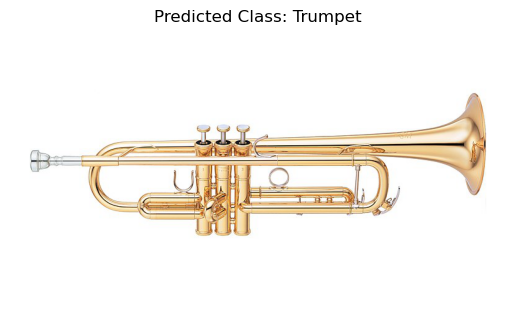

In [43]:
predict_instrument("Demo_images/5.jpg")